# Additional Modelling Challenges

## Maximal Independent Sets

In graph theory, an **independent set** is a set of vertices in a graph, no two of which are adjacent. A **maximal independent set** is an independent set that is not a subset of any other independent set.

A graph may have many maximal independent sets of widely varying sizes. Find a maximal independent set for any given graph. The data provided should use an array containing, for each node of the graph, the set of adjacent nodes.

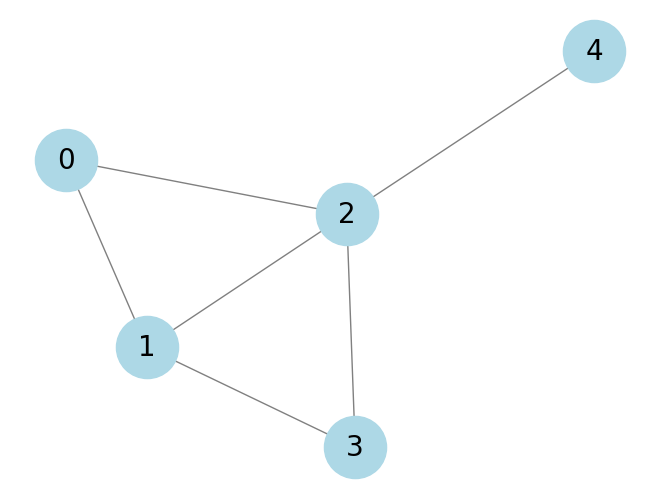

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4)])

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=20)
plt.show()

In [2]:
# The data provided should use an array containing, for each node of the graph, the set of adjacent nodes.
adjacency_info = [(node, set(adj.keys())) for node, adj in G.adjacency()]
print(adjacency_info)

[(0, {1, 2}), (1, {0, 2, 3}), (2, {0, 1, 3, 4}), (3, {1, 2}), (4, {2})]


In [3]:
adjacency_matrix = adjacency_matrix = nx.to_numpy_array(G, dtype=bool)

print(adjacency_matrix)

[[False  True  True False False]
 [ True False  True  True False]
 [ True  True False  True  True]
 [False  True  True False False]
 [False False  True False False]]


In [4]:
import cpmpy as cp

n = len(adjacency_matrix)
maximal_independent_set = cp.boolvar(n)

model = cp.Model()

# Independence.
for i in range(n):
    for j in range(n):
        if adjacency_matrix[i, j]:
            model += maximal_independent_set[i] + maximal_independent_set[j] <= 1

# Maximum.
model.maximize(maximal_independent_set.sum())

if model.solve():
    print("Maximum Independent Set:", [idx for idx, val in enumerate(maximal_independent_set.value()) if bool(val) is True])
    print("Size of Independent Set:", sum(maximal_independent_set.value()))# 
else:
    print("No solution found.")

Maximum Independent Set: [0, 3, 4]
Size of Independent Set: 3
